<a href="https://colab.research.google.com/github/Al-Amin20/ML-PROJECT-1/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETE-456  (Neural and Fuzzy systems in communications sessional)

## ID:1608020

**Lab-5:** Exploring different types of Classification Algorithms

**Objective:**

1.   To apply various classification algorithms on a real world dataset.




## Procedure:

*  PANDAS, NUMPHY and Matplotlib.pyplot library are called.
*  Dataset are downloaded.
*  Dataset are read by using PANDAS library.
*  Missing values of the dataset are checked and replaced by mean values of entries of the column.
* Features values and target values are selected by using corellation.
* One hot encoding are done.
* Train set and test set are selected .
* Fit transform was done for the train set.
* normalized values are done.
* Several classification algorithms(logistic regression,KNN, SVM,Random Forest,Decision Tree Classifier,Naive Bayes) were used.
* Mean value error, mean squared error,R^2 error was checked on different regressor process. 
* Final values are compared 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt  

In [ ]:
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

In [ ]:
dataset = pd.read_csv('stroke-data.csv')
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# Nan value are checked by using isnull. 
print(dataset[pd.isnull(dataset.id)])
print(dataset[pd.isnull(dataset.gender)])
print(dataset[pd.isnull(dataset.age)])
print(dataset[pd.isnull(dataset.hypertension)])
print(dataset[pd.isnull(dataset.heart_disease)])
print(dataset[pd.isnull(dataset.ever_married)])
print(dataset[pd.isnull(dataset.work_type)])
print(dataset[pd.isnull(dataset.avg_glucose_level)])
print(dataset[pd.isnull(dataset.bmi)])
print(dataset[pd.isnull(dataset.smoking_status)])
print(dataset[pd.isnull(dataset.stroke)])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean")
imputer = imputer.fit(dataset[['bmi']])
dataset[['bmi']]= imputer.transform(dataset[['bmi']])

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
# here lebel encoding are done 
from sklearn.preprocessing import LabelEncoder
labelencoder_f = LabelEncoder()
dataset['gender'] = labelencoder_f.fit_transform(dataset['gender'])
dataset['ever_married'] = labelencoder_f.fit_transform(dataset['ever_married'])
dataset['work_type'] = labelencoder_f.fit_transform(dataset['work_type'])
dataset['Residence_type'] = labelencoder_f.fit_transform(dataset['Residence_type'])
dataset['smoking_status'] = labelencoder_f.fit_transform(dataset['smoking_status'])

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
feature = dataset[['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
target = dataset[['stroke']]

In [ ]:
feature

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [ ]:
target

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
print(x_train.shape)
print(x_test.shape)

(4088, 11)
(1022, 11)


In [ ]:
x_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,61960,1,82.0,0,1,1,2,1,144.90,26.400000,3
380,31741,1,4.0,0,0,0,4,0,106.22,16.700000,0
3524,59451,1,58.0,0,0,1,2,1,79.95,25.900000,2
352,40670,0,20.0,0,0,0,2,0,96.57,34.100000,2
4927,25391,0,10.0,0,0,0,4,0,69.84,13.700000,0
...,...,...,...,...,...,...,...,...,...,...,...
472,2953,0,43.0,0,0,1,2,0,75.05,22.900000,3
4446,47799,0,42.0,0,0,1,2,1,191.94,27.900000,2
660,61013,1,52.0,0,0,0,2,0,69.37,36.200000,0
57,66400,1,78.0,0,0,1,2,1,237.75,28.893237,1


In [ ]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

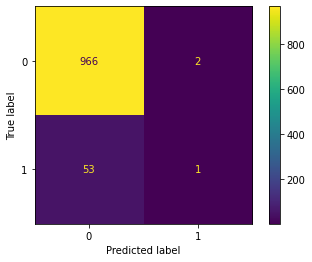

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,f1_score,precision_score,recall_score
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



**KNN**

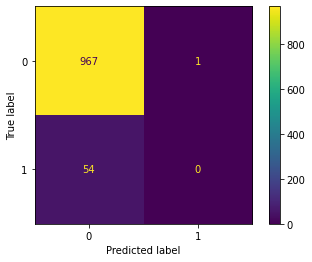

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
knn_classifier.fit(x_train,y_train)
y_pred = knn_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

**SVM**

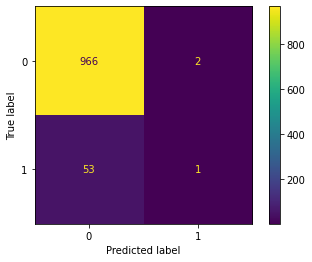

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



In [ ]:
from sklearn.svm import SVC
# Classifier Model
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(x_train,y_train)
# Prediction
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

**Decision Tree**

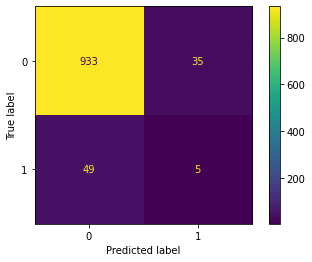

              precision    recall  f1-score   support

          No       0.95      0.96      0.96       968
         Yes       0.12      0.09      0.11        54

    accuracy                           0.92      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.91      0.92      0.91      1022



In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))


**Random Forest**

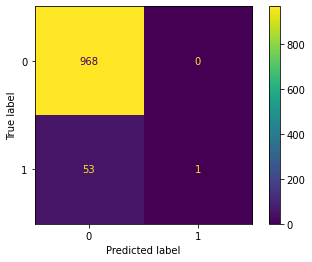

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, criterion ='entropy', random_state = 0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

**Naive Bayes**

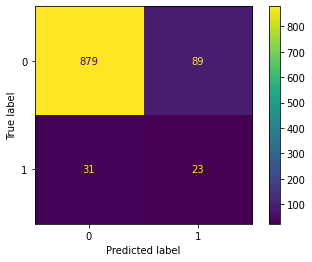

              precision    recall  f1-score   support

          No       0.97      0.91      0.94       968
         Yes       0.21      0.43      0.28        54

    accuracy                           0.88      1022
   macro avg       0.59      0.67      0.61      1022
weighted avg       0.93      0.88      0.90      1022



In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

In [ ]:
! pip install klib

In [ ]:
import klib
klib.corr_mat(dataset)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.16,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.17,0.13
bmi,0.00,0.33,0.16,0.04,0.17,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


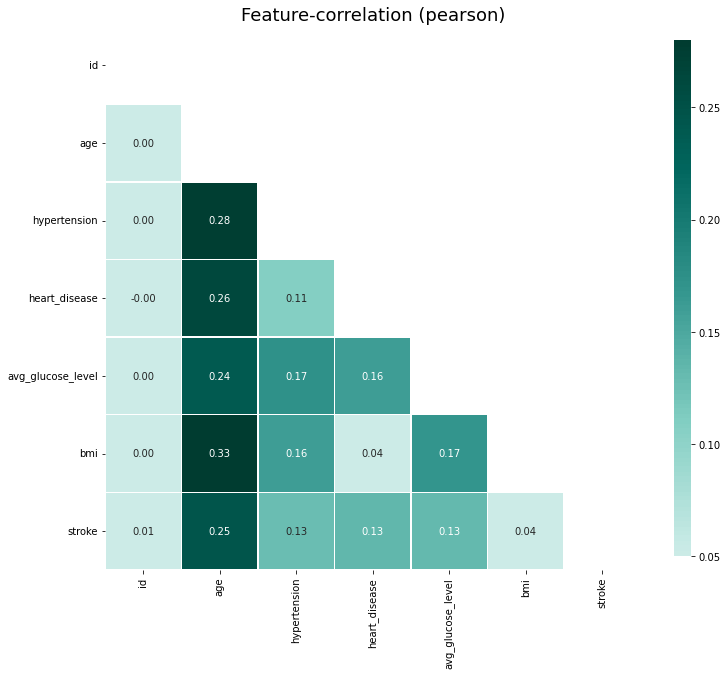

In [ ]:
klib.corr_plot(dataset)

### Final Results:

**Logistic Regression**



```
               precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.33      0.02      0.04        54

    accuracy                           0.95      1022

   macro avg       0.64      0.51      0.50      1022

weighted avg       0.92      0.95      0.92      1022
```



**KNN**

```
  precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022

 macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

```
**SVM**

```
       precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022

```
**Decision Tree**

```
              precision    recall  f1-score   support

          No       0.95      0.96      0.96       968
         Yes       0.12      0.09      0.11        54

    accuracy                           0.92      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.91      0.92      0.91      1022

```
**Random Forest**


```
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022
```

**Naive Bayes**


```
 precision    recall  f1-score   support

          No       0.97      0.91      0.94       968
         Yes       0.21      0.43      0.28        54

    accuracy                           0.88      1022
   macro avg       0.59      0.67      0.61      1022
weighted avg       0.93      0.88      0.90      1022
```






### Conclussion:


This is a classification problem. Different type of performance parameters are applied for this problem and checked the performance.Large scale values are converted to standarized value for reducing complexity of model.  It is seen that different algorithm had been efficient for different purposes. 